In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns; sns.set()
mpl.rcParams['figure.figsize'] = 6, 4
mpl.rcParams['savefig.dpi'] = 300

/Users/onno/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
N = 1000000                             # That's just the beginning
initial_readers = np.random.randn(N)    # Draw N random people from the global population (normally distributed along nerd scale)

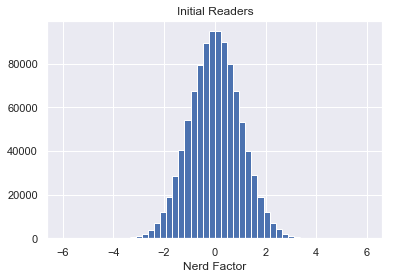

In [3]:
plt.figure()
plt.hist(initial_readers, range=(-6, 6), bins=50)
plt.title("Initial Readers")
plt.xlabel("Nerd Factor")
plt.savefig("initial.png")

In [4]:
from scipy.stats import norm
x = np.linspace(-6, 6, 500)         # 500 carefully chosen individuals that are evenly distributed along the nerd scale
probability = norm.pdf(x, loc=3)    # Asking them whether they would read on
probability /= probability.max()    # Normalizing

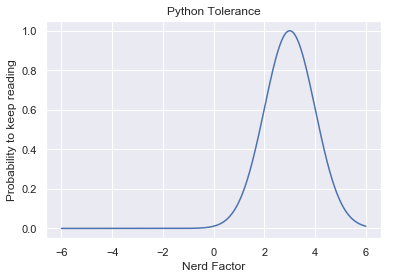

In [5]:
plt.plot(x, probability)
plt.title("Python Tolerance")
plt.xlabel("Nerd Factor")
plt.ylabel("Probability to keep reading")
plt.savefig("prob.png")
plt.show()

In [6]:
p_still_reading = norm.pdf(initial_readers, loc=3)       # Now ask the 'real' readers if they want to continue reading
p_still_reading /= p_still_reading.max()                 # Normalize
nerds = np.where(np.random.rand(N) < p_still_reading, 
                 initial_readers, np.full(N, np.nan))    # Filter out those that actually want to continue

/Users/onno/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:720: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/onno/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:721: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


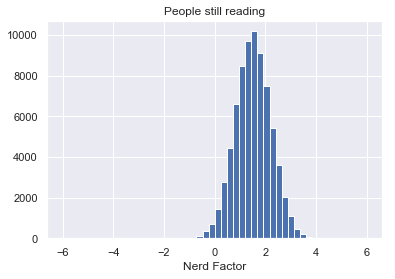

In [7]:
plt.hist(nerds, range=(-6, 6), bins=50)
plt.title("People still reading")
plt.xlabel("Nerd Factor")
plt.savefig("nerds.png")
plt.show()

In [8]:
print(f"Audience reduced to {(1 - np.sum(np.isnan(nerds)) / N) * 100 :.2f}% of what was zero to begin with.")

Audience reduced to 7.43% of what was zero to begin with.
